In [4]:
import sklearn
import pandas as pd
import numpy as np
import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

Text(0, 0.5, 'relu(x), tanh(x)')

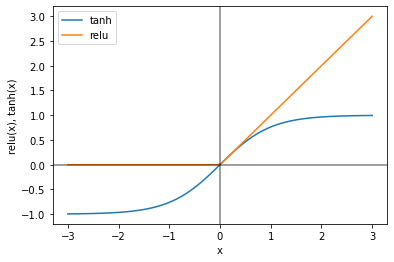

In [2]:
line=np.linspace(-3,3,100)
plt.plot(line,np.tanh(line),label="tanh")
plt.plot(line,np.maximum(line,0),label="relu")
plt.axvline(x=0,color="black",alpha=0.5)
plt.axhline(y=0,color="black",alpha=0.5)
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

Text(0, 0.5, 'Feature 1')

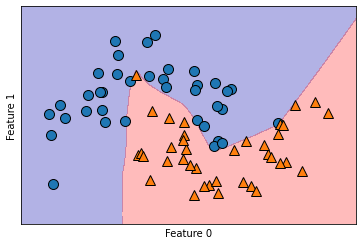

In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
X,y= make_moons(n_samples=100,noise=0.25,random_state=3)
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=42)
mlp=MLPClassifier(solver="lbfgs",random_state=0).fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

C:\Users\Daniel\anaconda3\envs\py37ml\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, 'Feature 1')

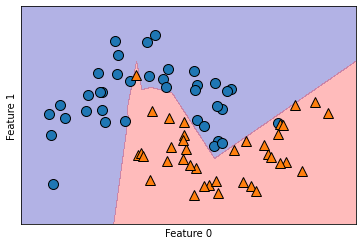

In [4]:
mlp=MLPClassifier(solver="lbfgs",random_state=0,hidden_layer_sizes=[10])
mlp.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


Text(0, 0.5, 'Feature 1')

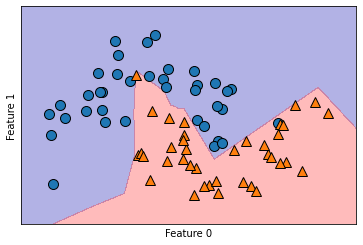

In [5]:
mlp=MLPClassifier(solver="lbfgs",random_state=0,hidden_layer_sizes=[10,10])
mlp.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

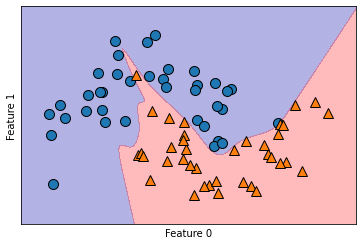

In [6]:
mlp=MLPClassifier(solver="lbfgs",random_state=0,hidden_layer_sizes=[10,10],activation="tanh")
mlp.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

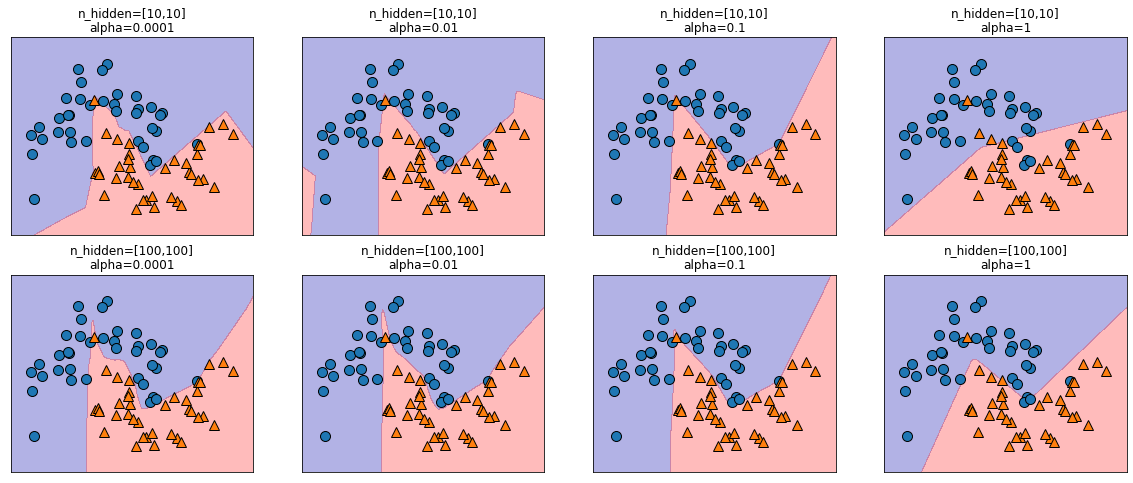

In [7]:
fig,axes=plt.subplots(2,4,figsize=(20,8))
for axx, n_hidden_nodes in zip(axes,[10,100]):
    for ax, alpha in zip(axx,[0.0001,0.01,0.1,1]):
        mlp=MLPClassifier(solver="lbfgs",random_state=0,max_iter=10000,
                          hidden_layer_sizes=[n_hidden_nodes,n_hidden_nodes],
                         alpha=alpha)
        mlp.fit(X_train,y_train)
        mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=0.3,ax=ax)
        mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,ax=ax)
        ax.set_title(f"n_hidden=[{n_hidden_nodes},{n_hidden_nodes}]\nalpha={alpha}")

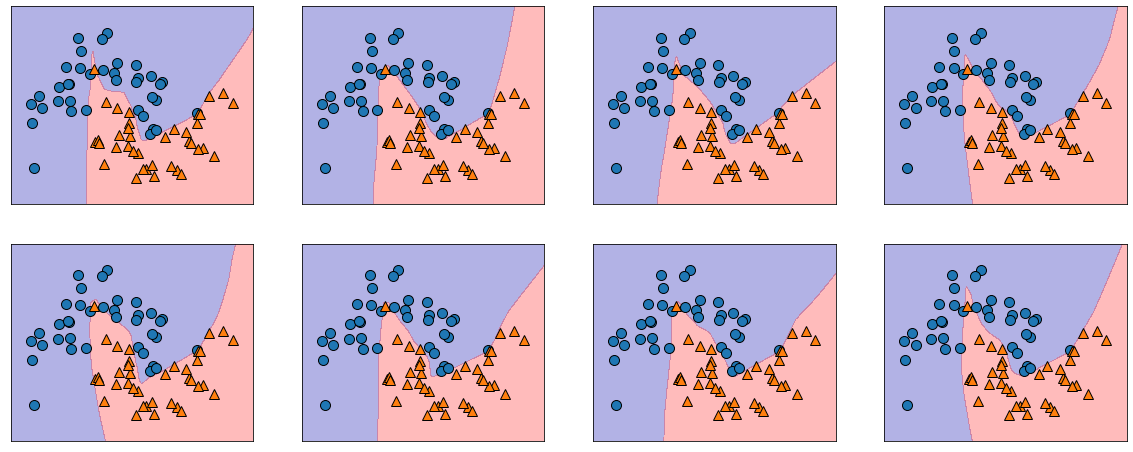

In [8]:
fig,axes=plt.subplots(2,4,figsize=(20,8))
for i, ax in enumerate(axes.ravel()):
    mlp=MLPClassifier(solver="lbfgs",random_state=i,hidden_layer_sizes=[100,100])
    mlp.fit(X_train,y_train)
    mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3,ax=ax)
    mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,ax=ax)

In [9]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
print(f"Cancer data per-feature maxima:\n{cancer.data.max(axis=0)}")

Cancer data per-feature maxima:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [10]:
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)
mlp=MLPClassifier(random_state=42).fit(X_train,y_train)
print(f"Accuracy on train set: {mlp.score(X_train,y_train)}")
print(f"Accuracy on test set: {mlp.score(X_test,y_test)}")

Accuracy on train set: 0.9389671361502347
Accuracy on test set: 0.916083916083916


In [11]:
mean_on_train=X_train.mean(axis=0)
std_on_train=X_train.std(axis=0)
X_train_scaled=(X_train-mean_on_train)/std_on_train
X_test_scaled=(X_test-mean_on_train)/std_on_train
mlp=MLPClassifier(random_state=0,max_iter=10000)
mlp.fit(X_train_scaled,y_train)
print(f"Accuracy on train set: {mlp.score(X_train_scaled,y_train)}")
print(f"Accuracy on test set: {mlp.score(X_test_scaled,y_test)}")

Accuracy on train set: 1.0
Accuracy on test set: 0.972027972027972


In [12]:
mlp=MLPClassifier(random_state=0,max_iter=1000,alpha=1)
mlp.fit(X_train_scaled,y_train)
print(f"Accuracy on train set: {mlp.score(X_train_scaled,y_train)}")
print(f"Accuracy on test set: {mlp.score(X_test_scaled,y_test)}")

Accuracy on train set: 0.9882629107981221
Accuracy on test set: 0.972027972027972


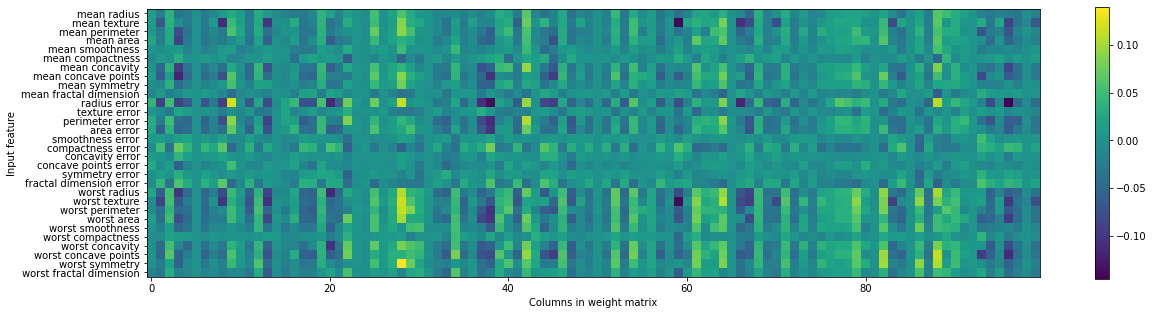

In [13]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0],interpolation="none",cmap="viridis")
plt.yticks(range(30),cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

In [14]:
mlp.coefs_[0].shape

(30, 100)

In [18]:
from sklearn.datasets import make_blobs, make_circles
X,y = make_circles(noise=0.25,factor=0.5,random_state=1)

y_named=np.array(["blue","red"])[y]
print(y_named)
print(y)

['red' 'red' 'blue' 'red' 'red' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'blue' 'red' 'red' 'red' 'blue' 'blue' 'blue' 'red' 'blue' 'blue' 'red'
 'red' 'red' 'blue' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red'
 'red' 'red' 'blue' 'blue' 'red' 'blue' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'blue' 'blue' 'red' 'blue' 'red' 'blue' 'red' 'blue' 'blue' 'red'
 'blue' 'blue' 'red' 'blue' 'red' 'blue' 'red' 'red' 'blue' 'blue' 'red'
 'blue' 'red' 'blue' 'red' 'red' 'blue' 'red' 'red' 'blue' 'red' 'blue'
 'red' 'red' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'red' 'blue' 'blue'
 'red' 'red' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'blue' 'red' 'blue'
 'blue']
[1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 0 0
 1 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1
 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 0]


In [19]:
X_train,X_test,y_train_named,y_test_named,y_train,y_test=train_test_split(X,y_named,y,random_state=0)

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt=GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train,y_train_named)
print(f"X_test.shape: {X_test.shape}")
print(f"Decision function shape: {gbrt.decision_function(X_test).shape}")

X_test.shape: (25, 2)
Decision function shape: (25,)


In [23]:
print(f"Decision function:\n{gbrt.decision_function(X_test)[:6]}")

Decision function:
[ 4.13592603 -1.70169917 -3.95106099 -3.62609552  4.28986642  3.66166081]


In [24]:
print(f"Thresholded decision function:\n{gbrt.decision_function(X_test)>0}")
print(f"Predictions:\n {gbrt.predict(X_test)}")

Thresholded decision function:
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Predictions:
 ['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [25]:
greater_zero=(gbrt.decision_function(X_test)>0).astype(int)
pred=gbrt.classes_[greater_zero]
print(f"pred is equal to predictions: {np.all(pred==gbrt.predict(X_test))}")

pred is equal to predictions: True


In [26]:
decision_function=gbrt.decision_function(X_test)
print(f"Decision function min: {decision_function.min()}\nDecision function max: {decision_function.max()}")

Decision function min: -7.690971785101899
Decision function max: 4.289866423997604


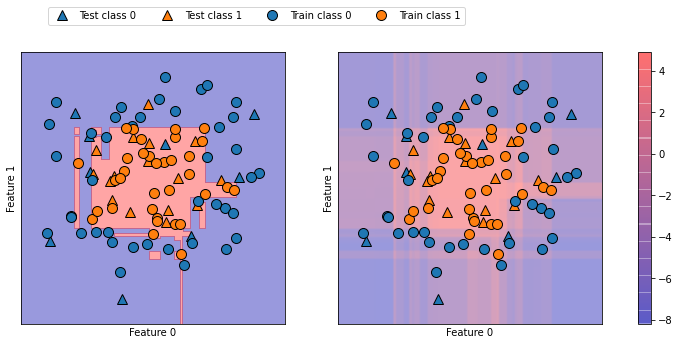

In [27]:
fig, axes=plt.subplots(1,2,figsize=(13,5))
mglearn.plots.plot_2d_separator(gbrt,X,ax=axes[0],alpha=.4,fill=True,cm=mglearn.cm2)
scores_image=mglearn.tools.plot_2d_scores(gbrt,X,ax=axes[1],alpha=.4,cm=mglearn.ReBl)
for ax in axes:
    mglearn.discrete_scatter(X_test[:,0],X_test[:,1],y_test,markers="^",ax=ax)
    mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,markers="o",ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
cbar=plt.colorbar(scores_image,ax=axes.tolist())
axes[0].legend(["Test class 0", "Test class 1", "Train class 0","Train class 1"],ncol=4,loc=(.1,1.1))

In [28]:
print(f"Shape of probabilities: {gbrt.predict_proba(X_test).shape}")

Shape of probabilities: (25, 2)


In [30]:
np.set_printoptions(precision=3)
print(f"Predicted probabilities: {gbrt.predict_proba(X_test)}")

Predicted probabilities: [[1.574e-02 9.843e-01]
 [8.458e-01 1.542e-01]
 [9.811e-01 1.887e-02]
 [9.741e-01 2.593e-02]
 [1.352e-02 9.865e-01]
 [2.505e-02 9.750e-01]
 [9.995e-01 4.567e-04]
 [1.614e-02 9.839e-01]
 [2.483e-01 7.517e-01]
 [3.205e-02 9.679e-01]
 [9.984e-01 1.558e-03]
 [1.352e-02 9.865e-01]
 [1.981e-02 9.802e-01]
 [7.686e-01 2.314e-01]
 [2.505e-02 9.750e-01]
 [9.848e-01 1.518e-02]
 [7.738e-01 2.262e-01]
 [9.805e-01 1.954e-02]
 [1.736e-02 9.826e-01]
 [1.614e-02 9.839e-01]
 [1.614e-02 9.839e-01]
 [3.414e-01 6.586e-01]
 [6.308e-02 9.369e-01]
 [9.344e-01 6.558e-02]
 [8.662e-01 1.338e-01]]


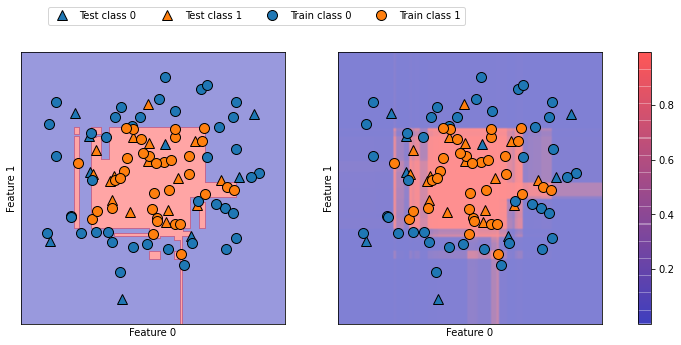

In [34]:
fig,axes=plt.subplots(1,2,figsize=(13,5))
mglearn.tools.plot_2d_separator(gbrt,X,ax=axes[0],alpha=.4,fill=True,cm=mglearn.cm2)
scores_image=mglearn.tools.plot_2d_scores(gbrt,X,ax=axes[1],alpha=.5,cm=mglearn.ReBl,
                                          function='predict_proba')
for ax in axes:
    mglearn.discrete_scatter(X_test[:,0],X_test[:,1],y_test,markers="^",ax=ax)
    mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,markers="o",ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
cbar=plt.colorbar(scores_image,ax=axes.tolist())
axes[0].legend(["Test class 0", "Test class 1", "Train class 0","Train class 1"],ncol=4,loc=(.1,1.1))

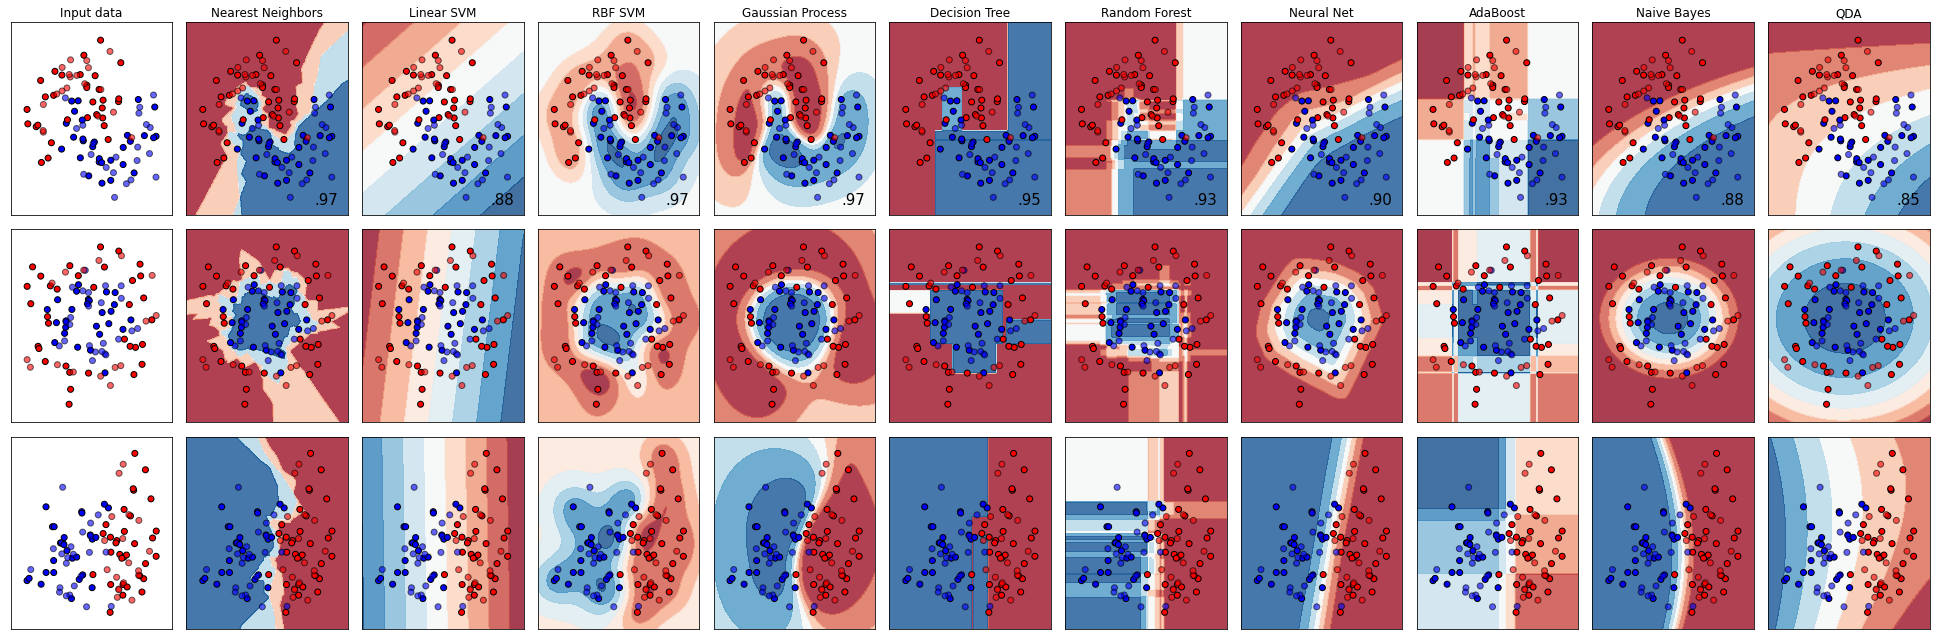

In [41]:
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h=0.02
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]
classifiers=[
    KNeighborsClassifier(n_neighbors=3),
    SVC(kernel="linear",C=0.025),
    SVC(gamma=2,C=1),
    GaussianProcessClassifier(1.0*RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5,n_estimators=10,max_features=1),
    MLPClassifier(alpha=1,max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()
]
X,y=make_classification(n_features=2,n_redundant=0,n_informative=2,
                       random_state=1,n_clusters_per_class=1)
rng=np.random.RandomState(2)
X+=2*rng.uniform(size=X.shape)
linearly_separable=(X,y)
datasets=[make_moons(noise=0.3,random_state=0),
         make_circles(noise=0.2,factor=0.5,random_state=1),
         linearly_separable]

figure=plt.figure(figsize=(27,9))
i=1
for ds_cnt, ds in enumerate(datasets):
    X,y=ds
    X=StandardScaler().fit_transform(X)
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.4,random_state=42)
    x_min,x_max=X[:,0].min()-.5, X[:,0].max()+.5
    y_min,y_max=X[:,1].min()-.5, X[:,1].max()+.5
    xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
    
    cm=plt.cm.RdBu
    cm_bright=ListedColormap(["#FF0000","#0000FF"])
    ax=plt.subplot(len(datasets),len(classifiers)+1,i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    ax.scatter(X_train[:,0],X_train[:,1],c=y_train, cmap=cm_bright,edgecolors="k")
    ax.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=cm_bright,alpha=0.6,edgecolors="k")
    ax.set_xlim(xx.min(),xx.max())
    ax.set_ylim(yy.min(),yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i+=1
    
    for name,clf in zip(names,classifiers):
        ax=plt.subplot(len(datasets),len(classifiers)+1,i)
        clf.fit(X_train,y_train)
        score=clf.score(X_test,y_test)
        
        if hasattr(clf,"decision_function"):
            Z=clf.decision_function(np.c_[xx.ravel(),yy.ravel()])
        else:
            Z=clf.predict_proba(np.c_[xx.ravel(),yy.ravel()])[:,1]
        Z=Z.reshape(xx.shape)
        ax.contourf(xx,yy,Z,cmap=cm,alpha=.8)
        
        ax.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=cm_bright,edgecolors="k")
        ax.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=cm_bright,edgecolors="k",alpha=.6)
        ax.set_xlim(xx.min(),xx.max())
        ax.set_ylim(yy.min(),yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt==0:
            ax.set_title(name)
            ax.text(xx.max()-.3,yy.min()+.3,("%.2f"%score).lstrip("0"),
                   size=15,horizontalalignment="right")
        i+=1
plt.tight_layout()
plt.show()

In [2]:
from sklearn.datasets import load_iris
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
iris=load_iris()
X_train,X_test,y_train,y_test=train_test_split(iris.data,iris.target,random_state=42)
gbrt=GradientBoostingClassifier(learning_rate=0.01,random_state=0)
gbrt.fit(X_train,y_train)
print(f"Decision function shape: {gbrt.decision_function(X_test).shape}")
print(f"Decision function: \n{gbrt.decision_function(X_test)}")

Decision function shape: (38, 3)
Decision function: 
[[-1.995715    0.04758267 -1.92720695]
 [ 0.06146394 -1.90755736 -1.92793758]
 [-1.99058203 -1.87637861  0.09686725]
 [-1.995715    0.04758267 -1.92720695]
 [-1.99730159 -0.13469108 -1.20341483]
 [ 0.06146394 -1.90755736 -1.92793758]
 [-1.995715    0.04758267 -1.92720695]
 [-1.99677434 -1.87637861  0.09686725]
 [-1.995715    0.04758267 -1.92720695]
 [-1.995715    0.04758267 -1.92720695]
 [-1.99677434 -1.87637861  0.07863156]
 [ 0.06146394 -1.90755736 -1.92793758]
 [ 0.06146394 -1.90755736 -1.92793758]
 [ 0.06146394 -1.90755736 -1.92793758]
 [ 0.06146394 -1.90755736 -1.92793758]
 [-1.995715    0.04758267 -1.92720695]
 [-1.99087515 -1.87637861  0.09686725]
 [-1.995715    0.04758267 -1.92720695]
 [-1.995715    0.04758267 -1.92720695]
 [-1.99087515 -1.87637861  0.09686725]
 [ 0.06146394 -1.90755736 -1.92793758]
 [-1.99730159 -1.86429671  0.04166049]
 [ 0.06146394 -1.90755736 -1.92793758]
 [-1.99087515 -1.87637861  0.09686725]
 [-1.990875

In [5]:
print(f"Argmax of decision function:\n{np.argmax(gbrt.decision_function(X_test),axis=1)}")

Argmax of decision function:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [8]:
print(f"Predictions:\n{gbrt.predict(X_test)}")
print(f"Predicted probabilities:\n {gbrt.predict_proba(X_test)[:6]}")
print(f"Sums: {gbrt.predict_proba(X_test)[:6].sum(axis=1)}")

Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predicted probabilities:
 [[0.10217718 0.78840034 0.10942248]
 [0.78347147 0.10936745 0.10716108]
 [0.09818072 0.11005864 0.79176065]
 [0.10217718 0.78840034 0.10942248]
 [0.10360005 0.66723901 0.22916094]
 [0.78347147 0.10936745 0.10716108]]
Sums: [1. 1. 1. 1. 1. 1.]


In [11]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(max_iter=1000)
named_target=iris.target_names[y_train]
logreg.fit(X_train,named_target)
print(f"Unique classes in training data: {logreg.classes_}")
print(f"Predictions: {logreg.predict(X_test)}")
argmax_dec_func=np.argmax(logreg.decision_function(X_test),axis=1)
print(f"Argmax of decision function:\n{argmax_dec_func}")
print(f"Argmax combined with classes_: {logreg.classes_[argmax_dec_func]}")

Unique classes in training data: ['setosa' 'versicolor' 'virginica']
Predictions: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'setosa' 'setosa' 'virginica' 'versicolor'
 'setosa']
Argmax of decision function:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Argmax combined with classes_: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'setosa' 'setosa'
 'set